## Árboles de Regresión

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../../Data-Sets/datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
regtree = DecisionTreeRegressor(min_samples_split = 30, min_samples_leaf=10, random_state=0)

In [7]:
regtree.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [8]:
preds = regtree.predict(data[predictors])

In [9]:
data["Preds"] = preds

In [10]:
data[["Preds", "medv"]] #Comparamos el valor real medv con la predicción del arbol de regresión

,Preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


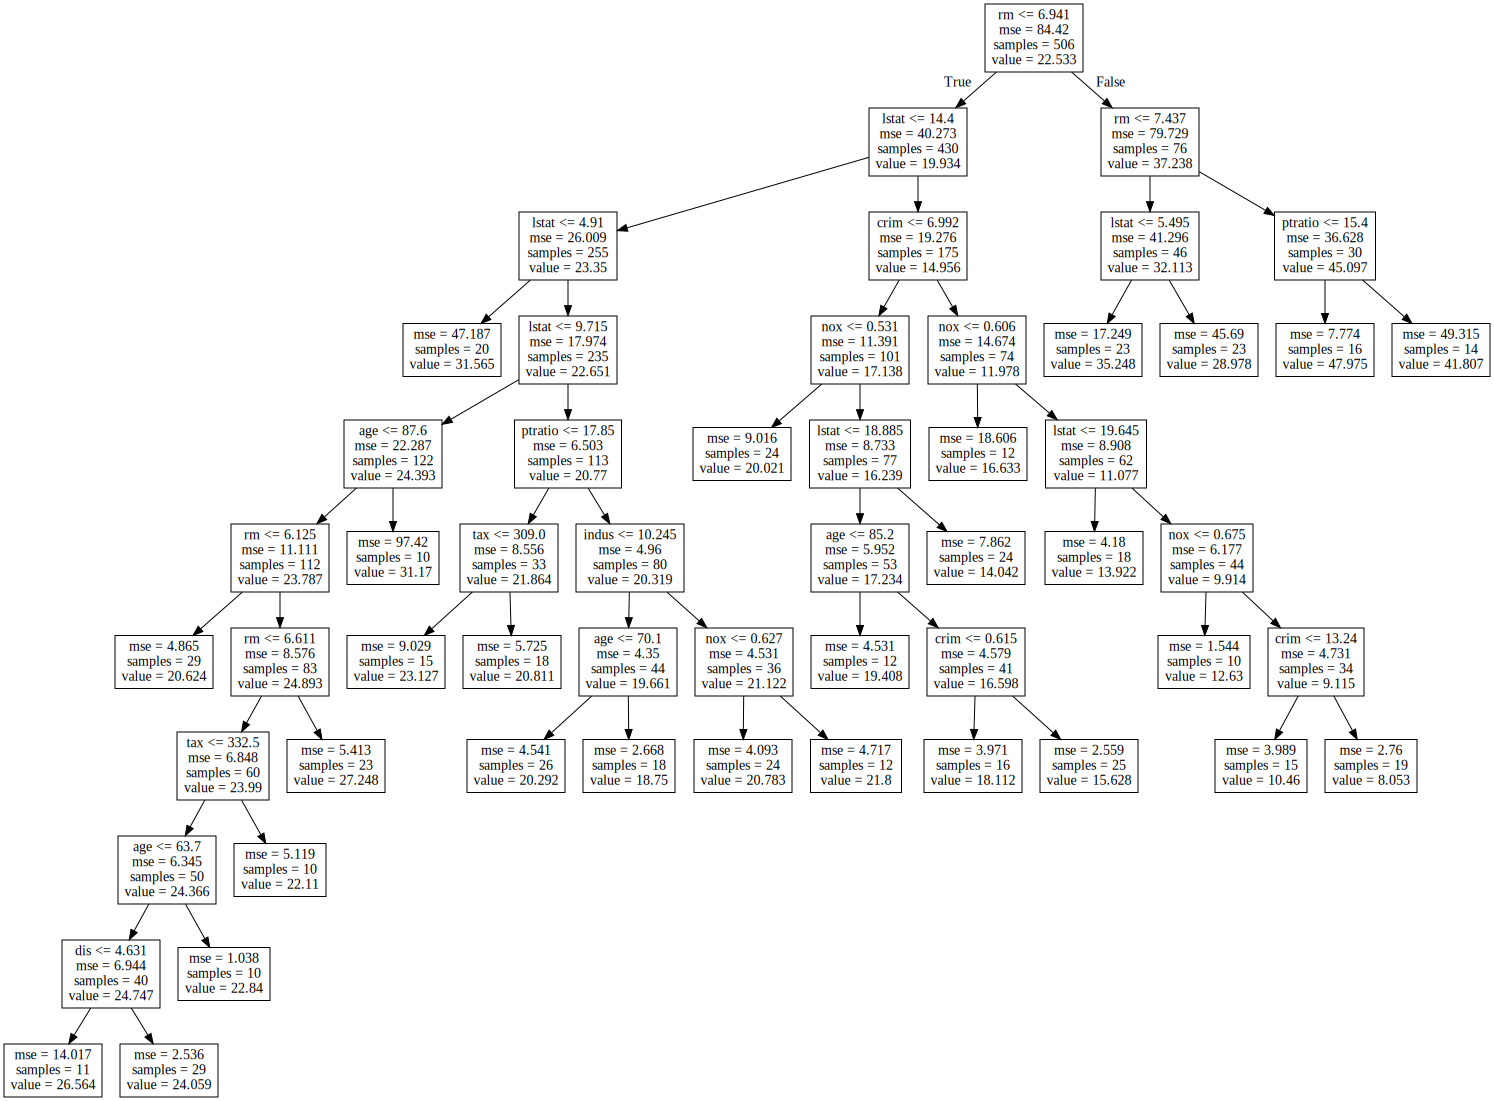

In [11]:
from sklearn.tree import export_graphviz
with open("../../Data-Sets/notebooks/resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
import os 
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
from graphviz import Source
file = open("../../Data-Sets/notebooks/resources/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [12]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold

In [13]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [14]:
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv=cv, n_jobs=1)
score = np.mean(scores)

In [15]:
score

-20.107307036443846

In [20]:
for i in range(1,11):
    regtree = DecisionTreeRegressor(min_samples_split = 30, min_samples_leaf=10, random_state=0, max_depth=i)
    regtree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i= " , i , "es de", score)

Score para i=  1 es de -54.64005096884788
Score para i=  2 es de -29.560344516775093
Score para i=  3 es de -23.929017292685447
Score para i=  4 es de -22.335323294283935
Score para i=  5 es de -20.54926189262014
Score para i=  6 es de -20.110616775207475
Score para i=  7 es de -20.068113350080786
Score para i=  8 es de -20.123136845099417
Score para i=  9 es de -20.11405771239422
Score para i=  10 es de -20.107307036443846


Podemos ver que el error medio cuadrado es mejor mientras más bajo es, por lo que con una profundidad de i=5 se estabiliza el error en -20.

In [22]:
regtree = DecisionTreeRegressor(min_samples_split = 30, min_samples_leaf=10, random_state=0, max_depth=5)
regtree.fit(X,Y)
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]

La variable más importante es **rm**, que es el número de habitaciones promedio por alquiler que tiene una importancia del 63% luego está **lstat** con una importancia del 29% y luego siguen las otras variables predictoras.

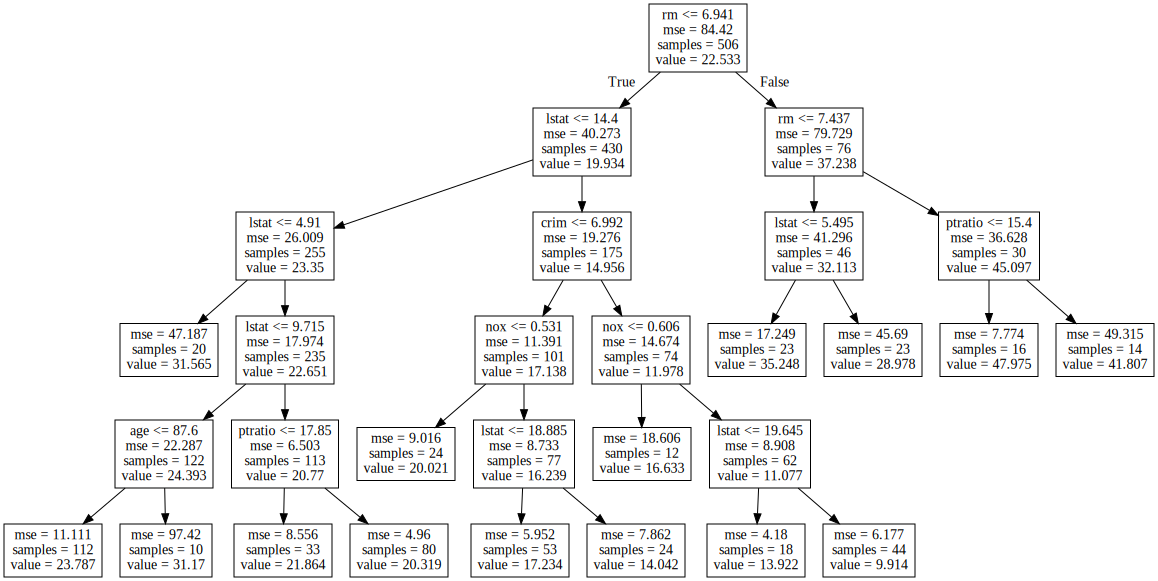

In [23]:
from sklearn.tree import export_graphviz
with open("../../Data-Sets/notebooks/resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
import os 
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
from graphviz import Source
file = open("../../Data-Sets/notebooks/resources/boston_rtree.dot", "r")
text = file.read()
Source(text)